# A very simple way to implement multiple-line title in plotly
It is not rare that you need a very long figure caption with multiple lines in your academic writting.  
Here is a very simple solution to caption your figure with multiple lines (even with latex).  
> * The solution is **double backslash** i.e. \\\\  
> * Treat the title/label as a whole markdown string, i.e. `title = r'$your text here with Latex$'`  

NOTE: The following example is about plotting the Marcenko-Pastur law in Random Mattrix Theory. Just ignor it if you are not intrested in it. This solution works in Jupyter Notebook (not tested in Jupyter Lab).

In [13]:
import plotly.express as px
import plotly.graph_objects as go  
import numpy as np

pi = np.pi
p = 500
n = 50000
c = p/n

X = np.random.randn(p,n)

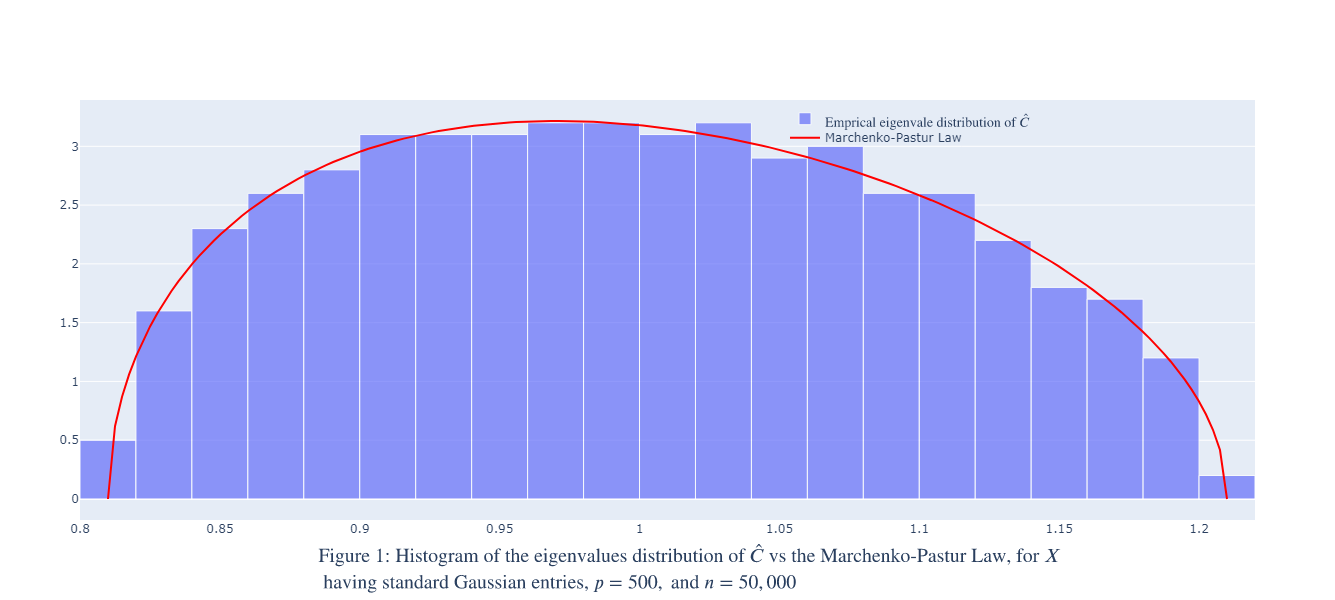

In [22]:
# sample convariance matrix
SCM = X@X.T/n

# eigenvalues of a sample covariance matrix
eig = np.linalg.eigvalsh(SCM)

# Marchenko-Pastur law
a = (1-np.sqrt(c))**2
b = (1+np.sqrt(c))**2
x = np.linspace(a, b, 160)

# limiting measure
mu = np.sqrt((x-a)*(b-x))/2/pi/c/x

# empirical histogram
fig = go.Figure()
trace_epf = go.Histogram(x=eig, opacity=0.7,
                         name = r'$ \text{Emprical eigenvale distribution of } \hat{C}$',
                         histnorm = 'probability density',
                         marker_line_width = 1,
                         marker_line_color = 'white',
                        )
fig.add_trace(trace_epf)

trace_mpl = go.Scatter(x = x, y = mu,
                       mode = 'lines',
                       name = 'Marchenko-Pastur Law',
                       line = dict(
                           shape = 'linear',
                           color = 'rgb(255, 0 , 0)'
                       ))
fig.add_trace(trace_mpl)

fig.update_layout(
    autosize = False,
    width = 800,
    height = 600,
    legend = dict(x = 0.6, y = 0.99, bgcolor='rgba(0,0,0,0)'), # transparent color
    title = dict(
        text = r'$\text{Figure 1: Histogram of the eigenvalues distribution of } \hat{C} \text{ vs the Marchenko-Pastur Law, for } X \\ \text{ having standard Gaussian entries, } p = 500, \text{ and } n = 50,000$',
        x = 0.5,
        y = 0.05
    )
)
fig.show()